# Execute the code below

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


# You have now a DataFrame with lots of weather data

In [27]:
df_weather['PRECIP_TOTAL_DAY_MM'].unique()

array([ 0.2,  0. ,  0.1,  1.3,  1.2,  4.4,  9.8,  2.4,  4.6,  2.1,  5.9,
        2.6, 15.1,  2. ,  4.3,  7.3,  1. , 18.6,  0.8,  9.4,  4. ,  1.6,
        6.3, 29.1,  0.9,  2.5,  4.9,  5.4, 11.1,  1.1, 47.6,  3.4,  5.3,
        4.2,  0.5,  5. ,  0.6,  1.8,  5.2, 10.1,  6.1,  3. ,  1.9,  2.3,
        6.2, 12.3,  7.8,  6. ,  2.7, 18.9,  1.4,  0.4,  0.3, 17.8,  1.7,
        3.6,  7. ,  7.5,  1.5, 27.3,  5.1, 14.1,  0.7, 16.3,  2.8,  5.5,
        9.9,  8.4,  7.6,  6.9, 24.1,  5.7,  3.9, 13.1,  7.7,  9.5,  3.2,
        8.9, 14.5, 11. , 30. ,  8. , 11.4,  3.8,  4.8, 11.2, 10.3, 16. ,
        8.5,  8.6,  9.7, 13.7,  9.1, 18.2,  2.2, 16.1, 31. , 35.1, 16.4,
        9. , 16.7])

# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

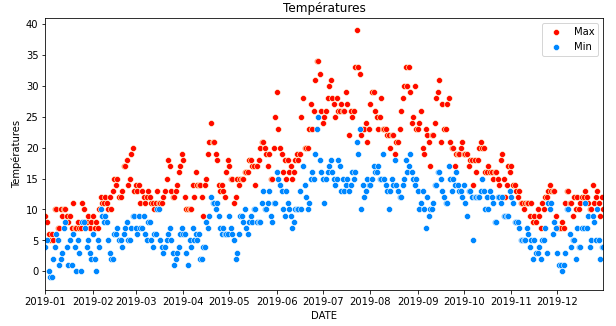


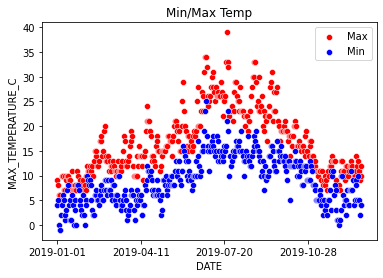

In [28]:
# First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph


sns.scatterplot(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], color = 'red') 
sns.scatterplot(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], color = 'blue')
plt.xticks(df_weather["DATE"][::100]) 
plt.legend(['Max','Min'])
plt.title('Min/Max Temp') 

plt.show() 




## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

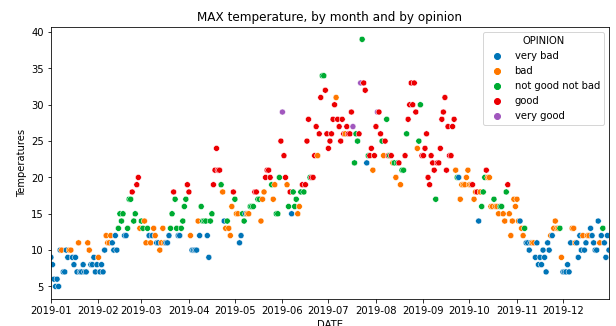

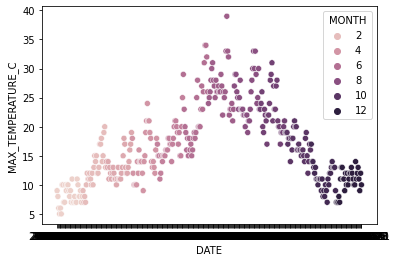

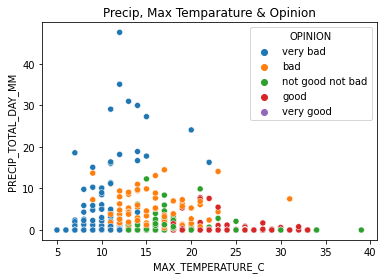

In [29]:
# Let's try to implement more functions - what's hue?
sns.scatterplot(x = "DATE", 
                y = "MAX_TEMPERATURE_C", 
                hue = 'MONTH', 
                data = df_weather) 
plt.show()

# Yeah, it's pretty cool! Did you notice that the syntax has changed a little ? "data =" is used to call the DataFrame

# Now, try to colorize, using hue, a scatterplot with MAX temperature on the X axis, precipation (rain amount) on the Y axis, and colorize with 'opinion' values.

# Of course, you'll write legend, readable axis ticks, and title.

sns.scatterplot(x = "MAX_TEMPERATURE_C", y = "PRECIP_TOTAL_DAY_MM", hue = 'OPINION', data = df_weather).set_title('Precip, Max Temparature & Opinion')
plt.show()

## Correlation coefficient and heatmap - change the palette and interpretation

For your information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/



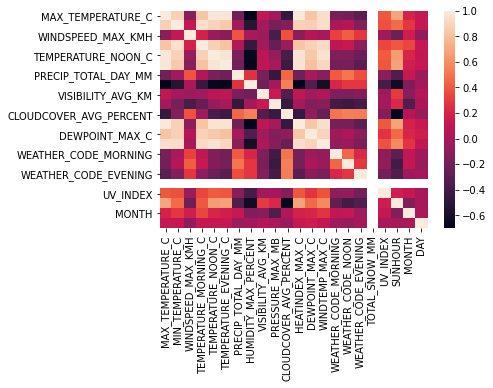

In [30]:
# Try to execute the code below :
sns.heatmap(df_weather.corr(), 
            cmap = "rocket")
plt.show()


**Wow! With only one line! Powerful!**

What does it mean ? Could you interpret this ? Why is the diagonal white ?

Could you find the two less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (cmap) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html

Then, please add a title of course.

Here is an example of what is expected :

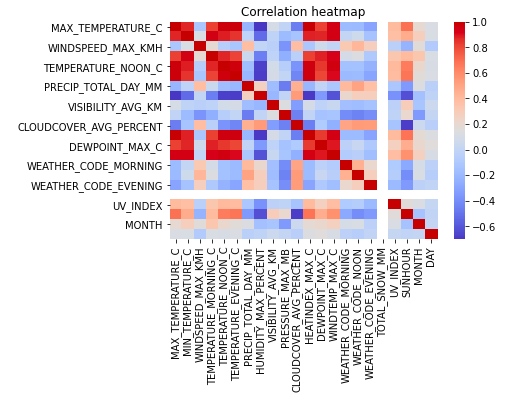

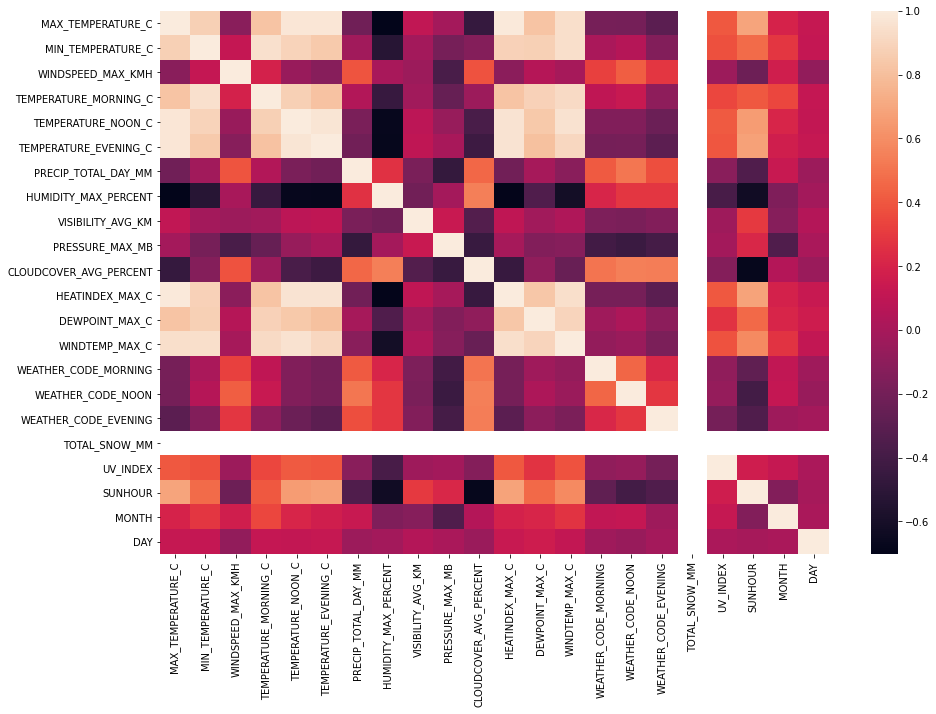

Per Column, least correlated column:
MAX_TEMPERATURE_C               PRESSURE_MAX_MB
MIN_TEMPERATURE_C             VISIBILITY_AVG_KM
WINDSPEED_MAX_KMH                WINDTEMP_MAX_C
TEMPERATURE_MORNING_C         VISIBILITY_AVG_KM
TEMPERATURE_NOON_C            WINDSPEED_MAX_KMH
TEMPERATURE_EVENING_C           PRESSURE_MAX_MB
PRECIP_TOTAL_DAY_MM              DEWPOINT_MAX_C
HUMIDITY_MAX_PERCENT          WINDSPEED_MAX_KMH
VISIBILITY_AVG_KM             MIN_TEMPERATURE_C
PRESSURE_MAX_MB                 HEATINDEX_MAX_C
CLOUDCOVER_AVG_PERCENT    TEMPERATURE_MORNING_C
HEATINDEX_MAX_C                 PRESSURE_MAX_MB
DEWPOINT_MAX_C              PRECIP_TOTAL_DAY_MM
WINDTEMP_MAX_C                WINDSPEED_MAX_KMH
WEATHER_CODE_MORNING          MIN_TEMPERATURE_C
WEATHER_CODE_NOON                DEWPOINT_MAX_C
WEATHER_CODE_EVENING                        DAY
TOTAL_SNOW_MM                               NaN
UV_INDEX                                    DAY
SUNHOUR                                     DAY
MON

In [53]:
# It's your turn now :
plt.figure(figsize= (15,10))
sns.heatmap(df_weather.corr())
# Please change the palette (cmap) to a more beautiful one.
sns.color_palette("rocket", as_cmap=True)
plt.show()

# Hey, some columns seem to be missing. Do you understand why?
df_weather['TOTAL_SNOW_MM'].unique()
# ---> Total Snow is always zero, therefore there is no pearson coefficent. 

# Two less correlated columns
less_correlated = df_weather.corr().abs()

#Show the least correalted columns 
print("Per Column, least correlated column:")
print(less_correlated.idxmin())

### Create a DataFrame with only high correlated columns with Max Temperature

In [32]:
# Can you read it ? What are the columns with highest correlation? 
# Print a DataFrame, containing following columns :
#     - only columns with correlation of > 0.7 OR  < -0.7 with max temperature
#     - Max temperature
#     - Opinion
# You can start by using df_weather.corr()

# Create correlation matrix
df = df_weather
corr_matrix = df_weather.corr().abs()


# Correlations for max Temperature 
relevant = corr_matrix.iloc[1]

# loop to check if absolute value is smaller than 0.7
to_drop = []
for i in range(0,len(relevant)):
 if relevant.iloc[i] < 0.7: 
  to_drop.append(relevant.index[i])

# Drop features 
df = df.drop(df[to_drop], axis=1)

print(df.info())
print(df_weather.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DATE                   365 non-null    object
 1   MAX_TEMPERATURE_C      365 non-null    int64 
 2   MIN_TEMPERATURE_C      365 non-null    int64 
 3   TEMPERATURE_MORNING_C  365 non-null    int64 
 4   TEMPERATURE_NOON_C     365 non-null    int64 
 5   TEMPERATURE_EVENING_C  365 non-null    int64 
 6   HEATINDEX_MAX_C        365 non-null    int64 
 7   DEWPOINT_MAX_C         365 non-null    int64 
 8   WINDTEMP_MAX_C         365 non-null    int64 
 9   TOTAL_SNOW_MM          365 non-null    int64 
 10  OPINION                365 non-null    object
dtypes: int64(9), object(2)
memory usage: 31.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------       

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


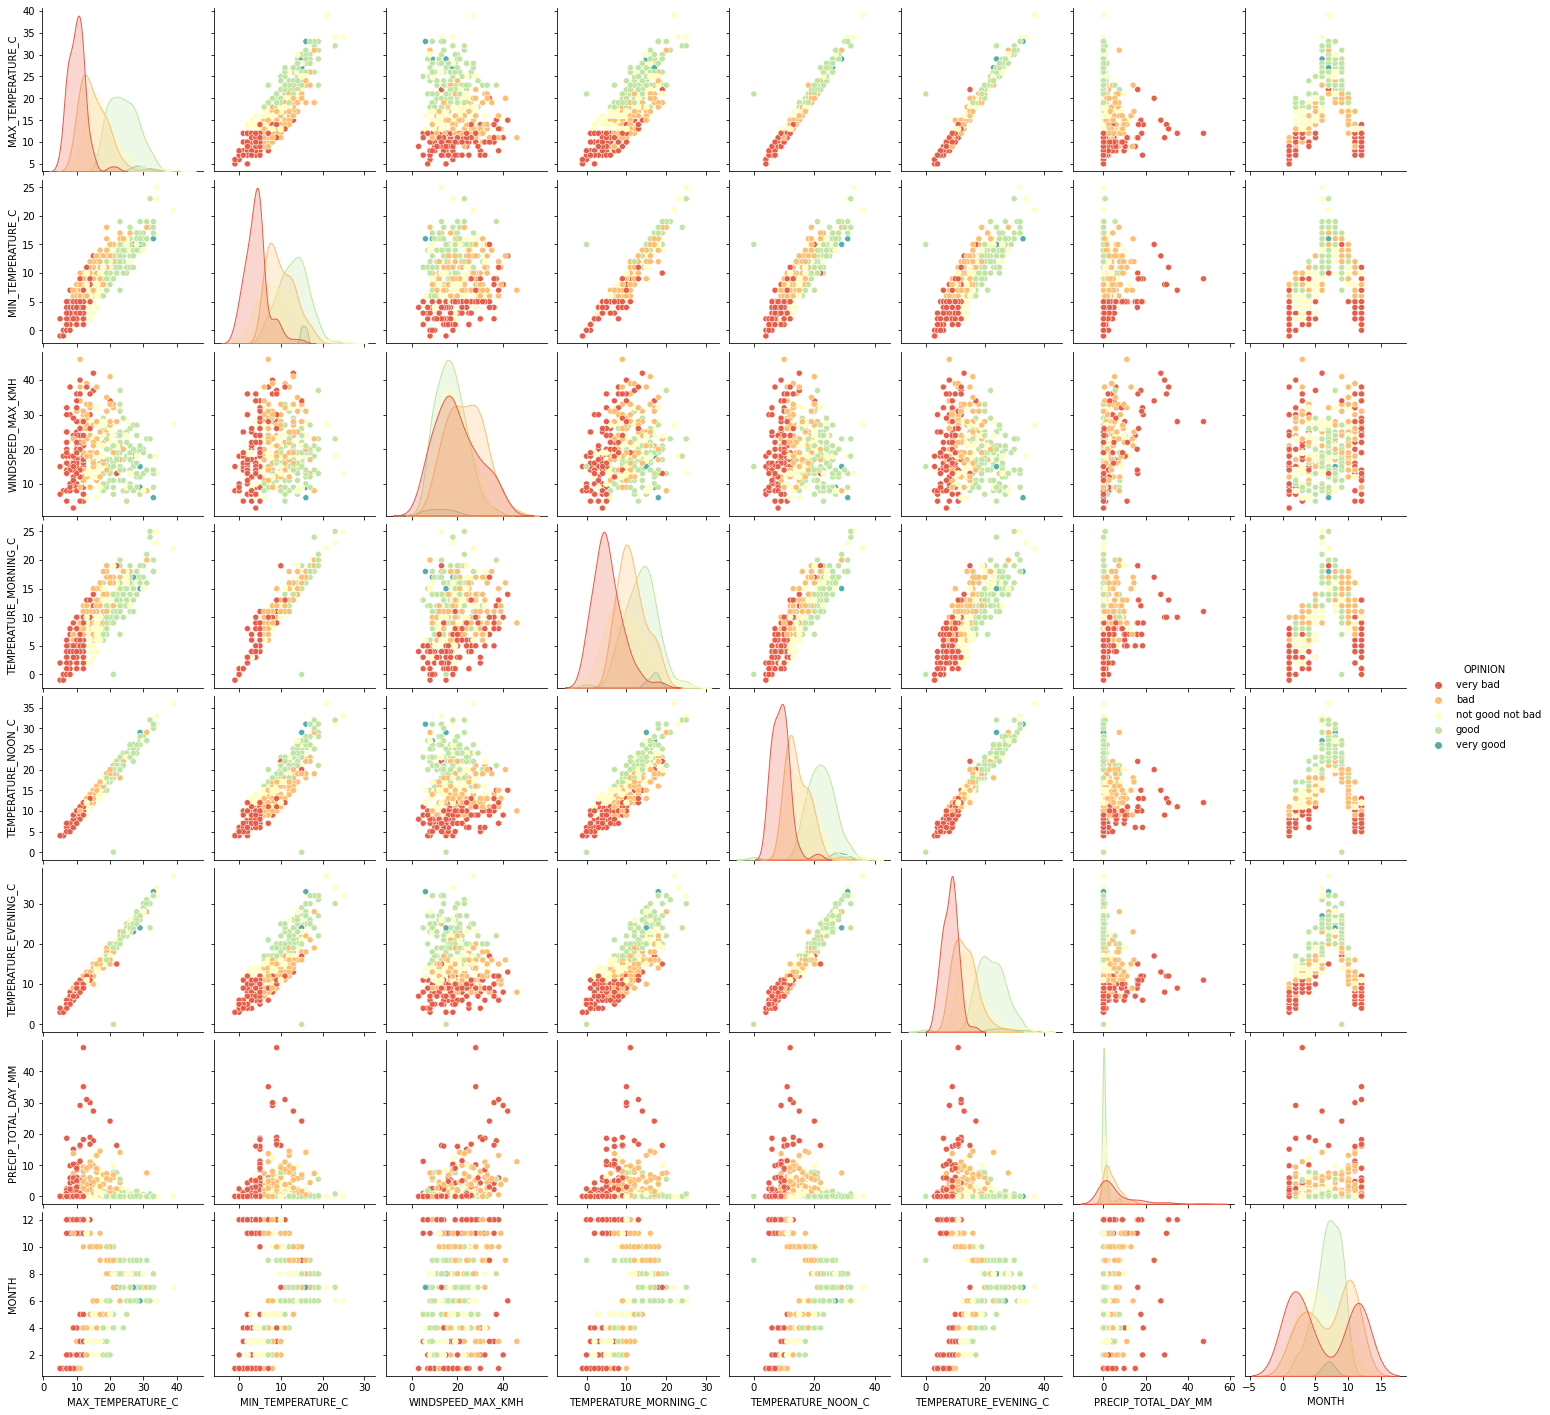

In [46]:
# No, don't tell me it works in one line ? Of course it does!

sns.pairplot(pd.concat([df_weather.iloc[:,0:8],df_weather.iloc[:,-2], df_weather['OPINION']], axis = 1), hue='OPINION', palette="Spectral")
# Find a way to colorize your pairplot according to 'opinion'

### PairPlot only with highly correlated columns with Max Temperature

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


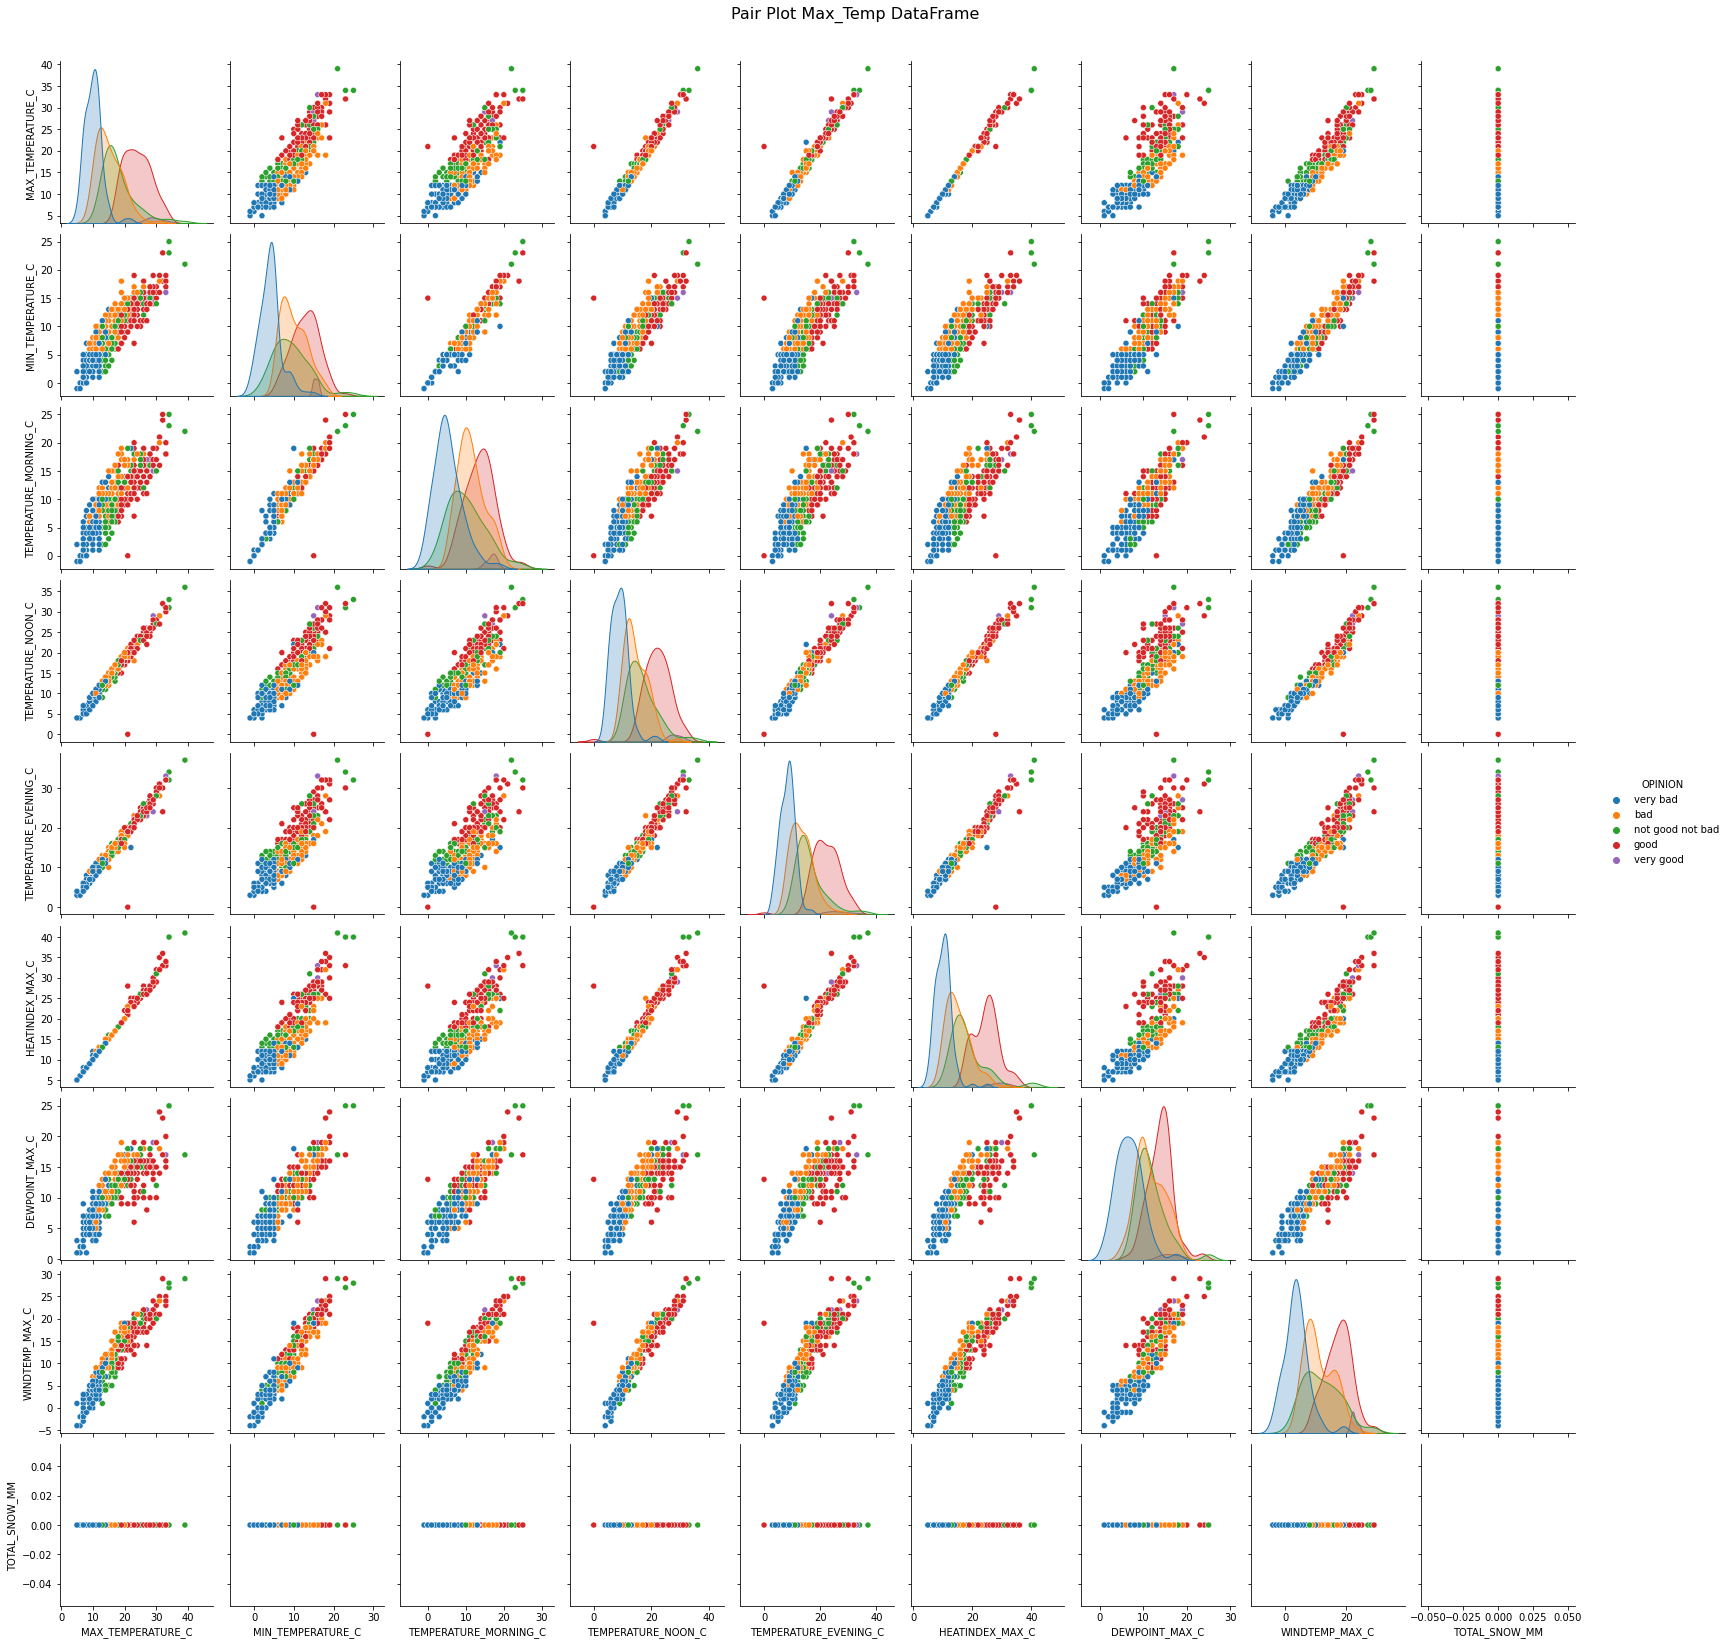

In [52]:
# Now, let's plot a pairplot with only the axis with high correlation with max temperature (you have created the DataFrame above)
# And add the opinion's color, and of course a title. You can change the palette for a beautiful one.

sns.pairplot(df, data=df, hue='OPINION')
plt.suptitle(t="Pair Plot Max_Temp DataFrame", y=1.02, fontsize=16)
sns.color_palette("Paired")
plt.show()


## Linear regression
Replace the axis with any better correlated axis of your choice

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


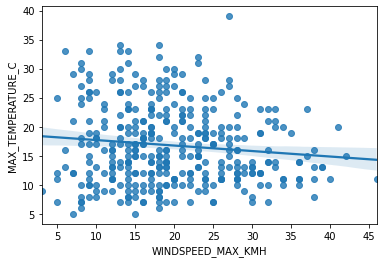

In [35]:
# Again in one line ! 
sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()
# Hmmmmm. Yes, technicaly, it works... But max temperature and wind speed don't seem well correlated...
# Hey, but you know lots of well-correlated axis. That's the chance to try them out!

### Linear regression with 2 columns correlated

In [36]:
df_weather.corr().abs()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
MAX_TEMPERATURE_C,1.000000,0.876892,0.114510,0.825536,0.975441,0.976796,0.210704,0.702905,0.102422,0.004506,0.457853,0.993324,0.826719,0.941037,0.190506,0.191807,0.301603,NaN,0.404340,0.690323,0.196215,0.123811
MIN_TEMPERATURE_C,0.876892,1.000000,0.116357,0.950702,0.888389,0.850258,0.023004,0.526656,0.013555,0.185420,0.130853,0.880895,0.875856,0.946671,0.014212,0.057358,0.139955,NaN,0.379809,0.471559,0.283569,0.120233
WINDSPEED_MAX_KMH,0.114510,0.116357,1.000000,0.189827,0.053186,0.121643,0.394238,0.007739,0.041671,0.376733,0.387952,0.110249,0.056339,0.000797,0.325675,0.423772,0.281717,NaN,0.042091,0.226626,0.169456,0.083761
TEMPERATURE_MORNING_C,0.825536,0.950702,0.189827,1.000000,0.874102,0.814347,0.048650,0.455566,0.020284,0.250654,0.039091,0.824918,0.882306,0.924278,0.099342,0.132621,0.096331,NaN,0.343759,0.407663,0.343293,0.121388
TEMPERATURE_NOON_C,0.975441,0.888389,0.053186,0.874102,1.000000,0.973353,0.175838,0.673392,0.083209,0.060409,0.375154,0.963276,0.841095,0.953704,0.146048,0.144571,0.235171,NaN,0.408798,0.657113,0.213586,0.112144
TEMPERATURE_EVENING_C,0.976796,0.850258,0.121643,0.814347,0.973353,1.000000,0.209041,0.676409,0.096888,0.004110,0.429395,0.963253,0.807732,0.912310,0.196340,0.186346,0.294992,NaN,0.398019,0.678705,0.170397,0.124853
PRECIP_TOTAL_DAY_MM,0.210704,0.023004,0.394238,0.048650,0.175838,0.209041,1.000000,0.265536,0.172711,0.468712,0.456302,0.206429,0.003174,0.111031,0.411905,0.513442,0.372366,NaN,0.113279,0.349541,0.133670,0.038824
HUMIDITY_MAX_PERCENT,0.702905,0.526656,0.007739,0.455566,0.673392,0.676409,0.265536,1.000000,0.210210,0.009099,0.541100,0.692777,0.344208,0.613490,0.210244,0.283311,0.286082,NaN,0.380635,0.627440,0.151859,0.016809
VISIBILITY_AVG_KM,0.102422,0.013555,0.041671,0.020284,0.083209,0.096888,0.172711,0.210210,1.000000,0.140802,0.331651,0.096070,0.018760,0.031536,0.158440,0.176006,0.139516,NaN,0.035014,0.295531,0.124253,0.050955
PRESSURE_MAX_MB,0.004506,0.185420,0.376733,0.250654,0.060409,0.004110,0.468712,0.009099,0.140802,1.000000,0.444519,0.003728,0.141155,0.129409,0.410147,0.438912,0.392729,NaN,0.017744,0.216754,0.347326,0.012966


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


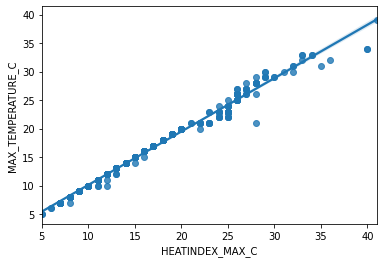

In [37]:
sns.regplot('HEATINDEX_MAX_C', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


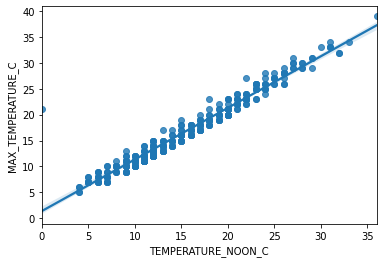

In [38]:
sns.regplot('TEMPERATURE_NOON_C', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()



# More and more...
Draw 2 different charts of your choice, on the same figure, to represent which season has better weather.

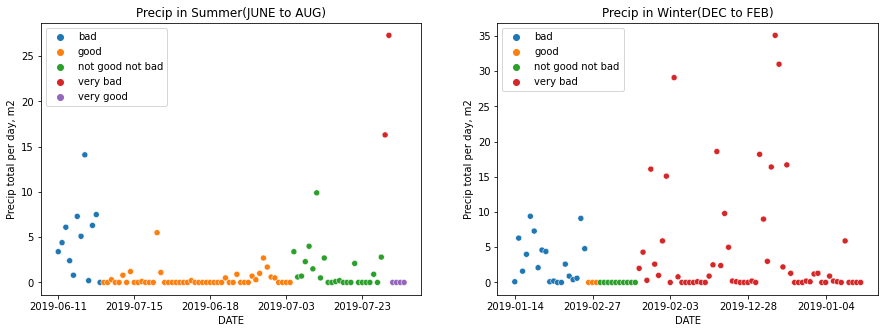

In [41]:
# Your code here

winter = pd.concat([df_weather[df_weather["MONTH"] >= 12], df_weather[df_weather["MONTH"] <= 2]]).sort_values(by='OPINION') 
summer = pd.concat([df_weather[df_weather["MONTH"] == 6], df_weather[df_weather["MONTH"] == 7], df_weather[df_weather["MONTH"] == 8]]).sort_values(by='OPINION')  

fig, ax = plt.subplots(figsize = (15,5))

ax1 = plt.subplot(122) 
ax1 = sns.scatterplot(x = "DATE", 
                y = "PRECIP_TOTAL_DAY_MM", 
                hue = 'OPINION', 
                data = winter) 
ax1.set_title("Precip in Winter(DEC to FEB)")
ax1.legend()
plt.xticks(winter["DATE"][::20]) 
plt.ylabel('Precip total per day, m2')

ax2 = plt.subplot(121)
ax2 = sns.scatterplot(x = "DATE", 
                y = "PRECIP_TOTAL_DAY_MM", 
                hue = 'OPINION', 
                data = summer) 
ax2.set_title("Precip in Summer(JUNE to AUG)")
plt.xticks(summer["DATE"][::20]) 
plt.legend()
plt.ylabel('Precip total per day, m2')

plt.show()

# Is it summer? Wow, you're the best! Now, challenge yourself with the other Seaborn quests.